In [1]:
import warnings
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import time

start_time = time.time()

warnings.filterwarnings('ignore')

df = pd.read_csv('../db/out/wta_s.csv')

df_2023 = df[df['date'].str.contains(
    '2023', na=False) | df['date'].str.contains('2022', na=False)]

df.drop(df_2023.index, inplace=True)

non_numeric_columns = df.select_dtypes(['object']).columns

df_numeric_only = df.drop(non_numeric_columns, axis=1)

df = df_numeric_only

df = df.drop(['match_id'], axis=1)

df = df.fillna(df.median())

df = df.fillna(df.median())

from sklearn.model_selection import train_test_split

Y = pd.DataFrame(df['y'])
df = df.drop(['y'], axis=1)
X = df
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, random_state=45, stratify=Y)

non_numeric_columns = df_2023.select_dtypes(['object']).columns

df_numeric_only = df_2023.drop(non_numeric_columns, axis=1)

df_2023 = df_numeric_only

df_2023 = df_2023.drop(['match_id'], axis=1)

df_2023 = df_2023.fillna(df_2023.median())

y_2023 = pd.DataFrame(df_2023['y'])
x_2023 = df_2023.drop(['y'], axis=1)


In [2]:
# Random Forest Basic parameters
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=45, n_jobs=-1, verbose=1)

result = model.fit(X_train, y_train)
y_pred = model.predict(X_test)


basic_report = classification_report(y_test, y_pred, output_dict=True)
print("Trening")
print(basic_report)
basic_pre = basic_report['weighted avg']['precision']


pred_val = model.predict(x_2023)
basic_report = classification_report(y_2023, pred_val, output_dict=True)
print("Walidacja")
print(basic_report)
basic_pre_val = basic_report['weighted avg']['precision']


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s


Trening
{'0': {'precision': 0.6655562958027982, 'recall': 0.6976256983240223, 'f1-score': 0.6812137742925333, 'support': 1432.0}, '1': {'precision': 0.6875901875901876, 'recall': 0.6549828178694158, 'f1-score': 0.6708905315029919, 'support': 1455.0}, 'accuracy': 0.6761343955663318, 'macro avg': {'precision': 0.6765732416964929, 'recall': 0.6763042580967191, 'f1-score': 0.6760521528977625, 'support': 2887.0}, 'weighted avg': {'precision': 0.6766610109225251, 'recall': 0.6761343955663318, 'f1-score': 0.676011031563478, 'support': 2887.0}}
Walidacja
{'0': {'precision': 0.6481113320079522, 'recall': 0.6829608938547486, 'f1-score': 0.6650799047942876, 'support': 1432.0}, '1': {'precision': 0.662704309063893, 'recall': 0.6268446943078004, 'f1-score': 0.6442759118815456, 'support': 1423.0}, 'accuracy': 0.6549912434325744, 'macro avg': {'precision': 0.6554078205359226, 'recall': 0.6549027940812745, 'f1-score': 0.6546779083379166, 'support': 2855.0}, 'weighted avg': {'precision': 0.655384819346

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [3]:
# Random Forest Hyperparameter Tuning

model = RandomForestClassifier(random_state=45, n_jobs=-1, verbose=1)

param_grid = {
    'max_depth': list(range(5, 15, 2)),
    'n_estimators': list(range(60, 120, 10)),
    'criterion': ['gini', 'entropy'],
}

search = GridSearchCV(model, param_grid,
                            cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

result = search.fit(X_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)



Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s


Best Score: 0.6775968414892053
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 60}


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished


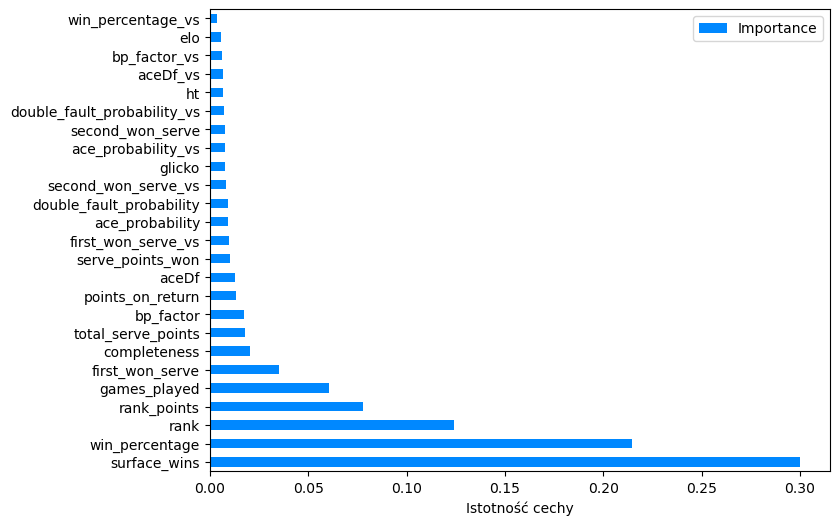

Optimal number of features : 7
                             Rank
games_played                    1
completeness                    1
first_won_serve                 1
rank                            1
rank_points                     1
surface_wins                    1
win_percentage                  1
bp_factor                       2
total_serve_points              3
points_on_return                4
first_won_serve_vs              5
aceDf                           6
serve_points_won                7
ace_probability                 8
second_won_serve                9
glicko                         10
ace_probability_vs             11
double_fault_probability_vs    12
bp_factor_vs                   13
second_won_serve_vs            14
double_fault_probability       15
aceDf_vs                       16
ht                             17
elo                            18
win_percentage_vs              19
Trening
Walidacja
{'0': {'precision': 0.6466621712744437, 'recall': 0.669692737430167

In [4]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest with RFECV
model = RandomForestClassifier(
    max_depth=7, n_estimators=60, criterion='entropy', n_jobs=-1, random_state=45)

result = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

feat_importances = pd.DataFrame(
    model.feature_importances_, index=X_test.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='barh', figsize=(8, 6), color='#0088ff')
plt.xlabel('Istotność cechy')
plt.show()


cv = StratifiedKFold(3)

model = RFECV(model, cv=cv, scoring='accuracy', step=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Optimal number of features : %d' % model.n_features_)

ranks = pd.DataFrame(
    model.ranking_, index=X.columns, columns=['Rank'])

print(ranks.sort_values(by='Rank', ascending=True))

selected_features = ranks[ranks['Rank'] == 1].index.values.tolist()


opti_report = classification_report(y_test, y_pred, output_dict=True)
print("Trening")
opti_pre = opti_report['weighted avg']['precision']
opti_f1 = opti_report['weighted avg']['f1-score']
opti_auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[::, 1])



pred_val = model.predict(x_2023)
opti_val_report = classification_report(y_2023, pred_val, output_dict=True)
print("Walidacja")
print(opti_val_report)
opti_pre_val = opti_val_report['weighted avg']['precision']
opti_f1_val = opti_val_report['weighted avg']['f1-score']
opti_auc_val = metrics.roc_auc_score(y_2023, model.predict_proba(x_2023)[::, 1])


In [5]:
import json

filename = 'results.json'

final_results = {
    "prediction_basic": basic_pre,
    "v_prcision_basic": basic_pre_val,
    "prediction_optimized": opti_pre,
    "v_prcision_optimized": opti_pre_val,
    "f1_score_opt": opti_f1,
    "f1_score_opt_val": opti_f1_val,
    "auc_opt": float(opti_auc),
    "auc_opt_val": float(opti_auc_val),
    "selected_features": selected_features,
}



with open(filename, 'r') as file:
    data = json.load(file)


data['Las losowy'] = (final_results)


with open('results.json', 'w') as file:
    json.dump(data, file, indent=4)